In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import  mean_squared_error
from sklearn.model_selection import  train_test_split


In [2]:
# load the data into the dataset and view the first five rows data
df = pd.read_csv('exercise03_car_sales_data.csv')
df.head()

,price,mileage,engType,year,model
0,3300,350,Diesel,1995,Discovery
1,3500,200,Petrol,2003,Freelander
2,3550,255,Diesel,2001,Discovery
3,3700,124,Petrol,2005,Freelander
4,3900,290,Diesel,1998,Range Rover


In [3]:
# view the last five rows data
df.tail()

,price,mileage,engType,year,model
24,23000,140,Diesel,2007,Range Rover Sport
25,24777,198,Gas,2008,Range Rover
26,25000,175,Gas,2007,Range Rover
27,25300,127,Diesel,2007,Range Rover
28,26500,260,Gas,2008,Range Rover


In [4]:
# check the shape of the dataset
df.shape

(29, 5)

In [5]:
# check more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    29 non-null     int64 
 1   mileage  29 non-null     int64 
 2   engType  29 non-null     object
 3   year     29 non-null     int64 
 4   model    29 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


In [6]:
# check for missing values
df.isna().sum()

price      0
mileage    0
engType    0
year       0
model      0
dtype: int64

In [7]:
# check mathematical relationship of the dataset
df.describe()

,price,mileage,year
count,29.000000,29.000000,29.000000
mean,14714.620690,207.413793,2004.379310
std,7831.640115,67.998171,3.922588
min,3300.000000,106.000000,1995.000000
25%,7000.000000,167.000000,2003.000000
50%,15900.000000,190.000000,2006.000000
75%,22000.000000,255.000000,2007.000000
max,26500.000000,355.000000,2010.000000


In [8]:
# check corr of the data
df.corr()

/tmp/ipykernel_81424/3353257033.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,mileage,year
price,1.000000,-0.458672,0.695434
mileage,-0.458672,1.000000,-0.709596
year,0.695434,-0.709596,1.000000


                                                 CATEGORICAL VALUES.

In [9]:
df['model'].value_counts()

Range Rover           10
Freelander             7
Discovery              6
Range Rover Sport      5
Range Rover Evoque     1
Name: model, dtype: int64

<Axes: ylabel='model'>

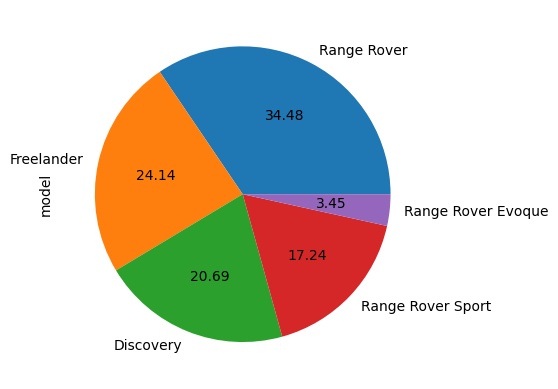

In [10]:
df['model'].value_counts().plot(kind='pie', autopct='%.2f')

In [43]:
df['engType'].value_counts()

Diesel    16
Gas        8
Petrol     5
Name: engType, dtype: int64

<Axes: ylabel='engType'>

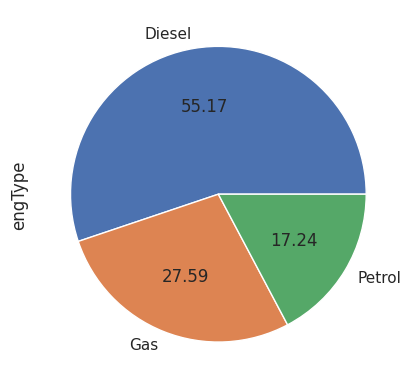

In [45]:
df['engType'].value_counts().plot(kind='pie', autopct='%.2f')

In [11]:
skew_mil = df.mileage.skew(axis=0, skipna=True)
print('Mileage skewness: ', skew_mil)

Mileage skewness:  0.5582115803253009


In [12]:
skew_year = df.year.skew(axis=0, skipna=True)
print('Year skewness: ', skew_year)

Year skewness:  -1.0911550866287647


/tmp/ipykernel_81424/4007947445.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

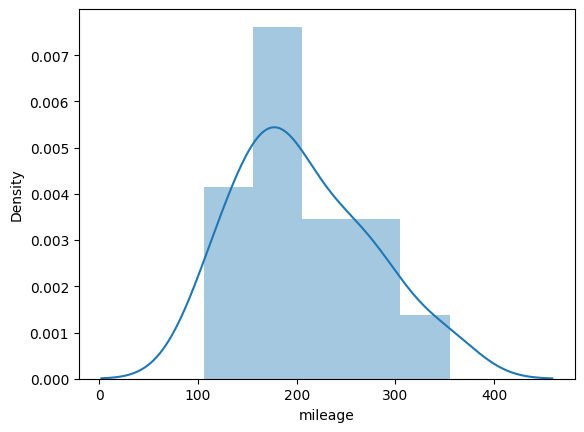

In [13]:
# a perfect skewness
sns.distplot(df['mileage'])

/tmp/ipykernel_81424/1705408248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


<Axes: xlabel='year', ylabel='Density'>

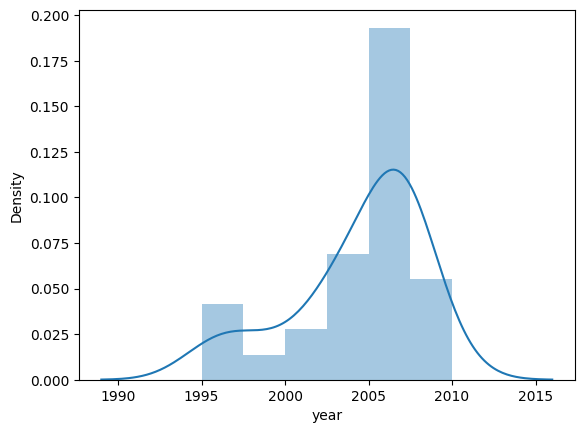

In [14]:
# A negative skewness
sns.distplot(df['year'])

EDA
This section will explore variables in the dataset using different various plots/charts.

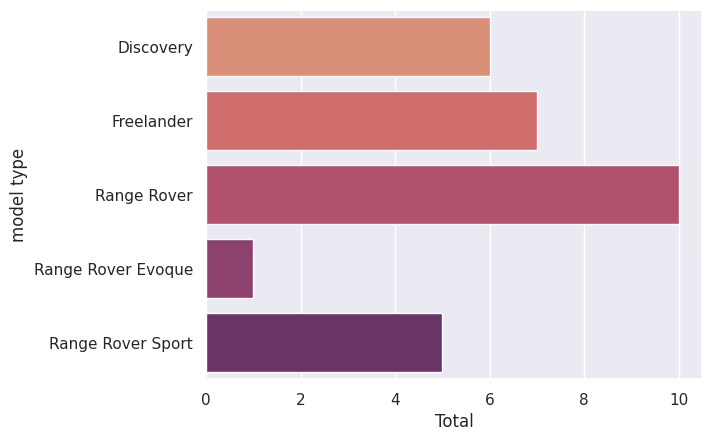

In [41]:
sns.set_theme(style='darkgrid')
sns.countplot(y='model', data=df, palette='flare')
plt.ylabel('model type')
plt.xlabel('Total')
plt.show()

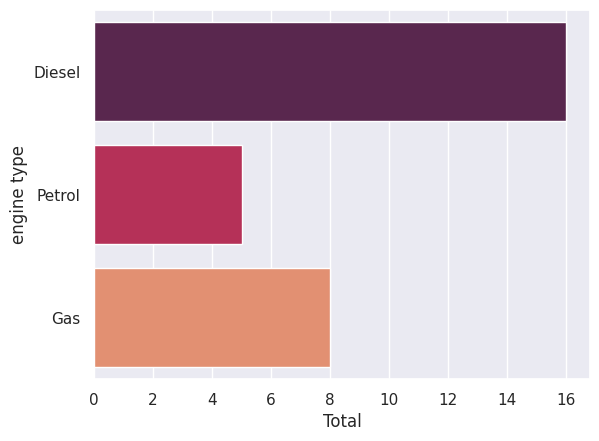

In [47]:
sns.set_theme(style='darkgrid')
sns.countplot(y='engType', data=df, palette='rocket')
plt.ylabel('engine type')
plt.xlabel('Total')
plt.show()

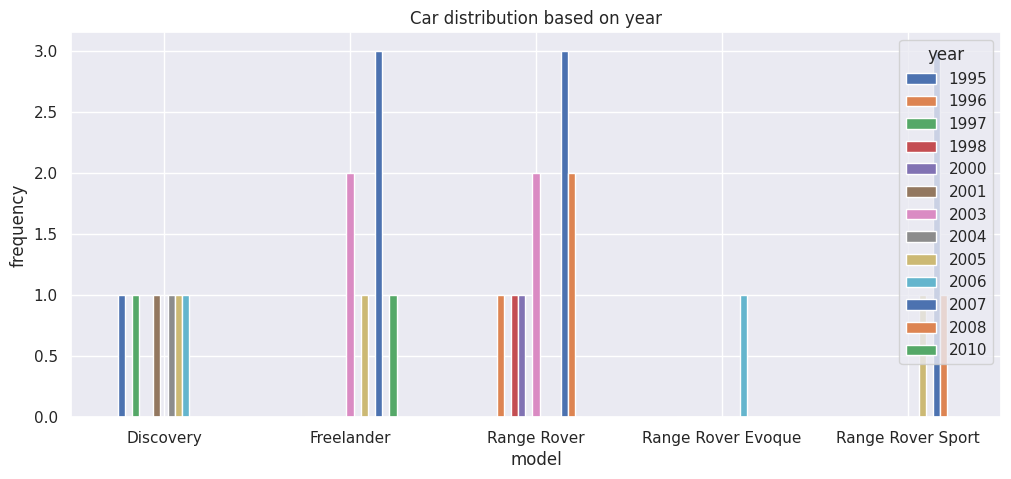

In [59]:
pd.crosstab(df.model,df.year).plot(kind='bar', figsize=(12,5))
plt.title('Car distribution based on year')
plt.xlabel('model')
plt.xticks(rotation=0)
plt.ylabel('frequency')
plt.show()

DATASET PREPARATION.

Data Binning.

In [60]:
# I used the numpy built-in function to group the column into 3 groups
bins = np.linspace(min(df['mileage']), max(df['mileage']), 4)

#create group names
g_names = ['low', 'medium', 'high']

# create a new column for the binned data
df['mileage-binned'] = pd.cut(df['mileage'], bins,labels=g_names, include_lowest=True)
df[['mileage', 'mileage-binned']].head(10)

,mileage,mileage-binned
0,350,high
1,200,medium
2,255,medium
3,124,low
4,290,high
5,298,high
6,167,low
7,190,medium
8,355,high
9,295,high


In [61]:
df['mileage-binned'].value_counts()

low       14
medium    10
high       5
Name: mileage-binned, dtype: int64

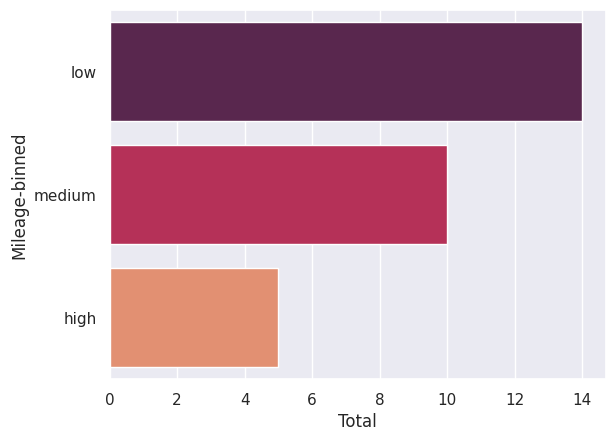

In [63]:
sns.set_theme(style='darkgrid')
sns.countplot(y='mileage-binned', data=df, palette='rocket')
plt.ylabel('Mileage-binned')
plt.xlabel('Total')
plt.show()

In [64]:
bins = np.linspace(min(df['year']), max(df['year']), 4)

#create group names
g_names = ['vintage', 'antique', 'classic']

# create a new column for the binned data
df['year-binned'] = pd.cut(df['year'], bins,labels=g_names, include_lowest=True)
df[['year', 'year-binned']].head()

,year,year-binned
0,1995,vintage
1,2003,antique
2,2001,antique
3,2005,antique
4,1998,vintage


In [65]:
df['year-binned'].value_counts()

classic    15
antique     9
vintage     5
Name: year-binned, dtype: int64

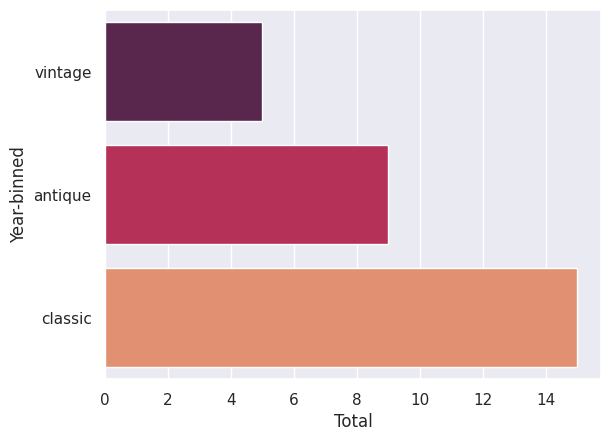

In [66]:
sns.set_theme(style='darkgrid')
sns.countplot(y='year-binned', data=df, palette='rocket')
plt.ylabel('Year-binned')
plt.xlabel('Total')
plt.show()

In [75]:
# working with linear regression
from sklearn.linear_model import  LinearRegression
lm = LinearRegression()
X = df[['mileage']]
Y = df['price']
lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

array([ 7182.18051179, 15106.2711463 , 12200.77124698, 19121.14373446,
       10351.8167656 ])

(0.0, 27706.161761497933)

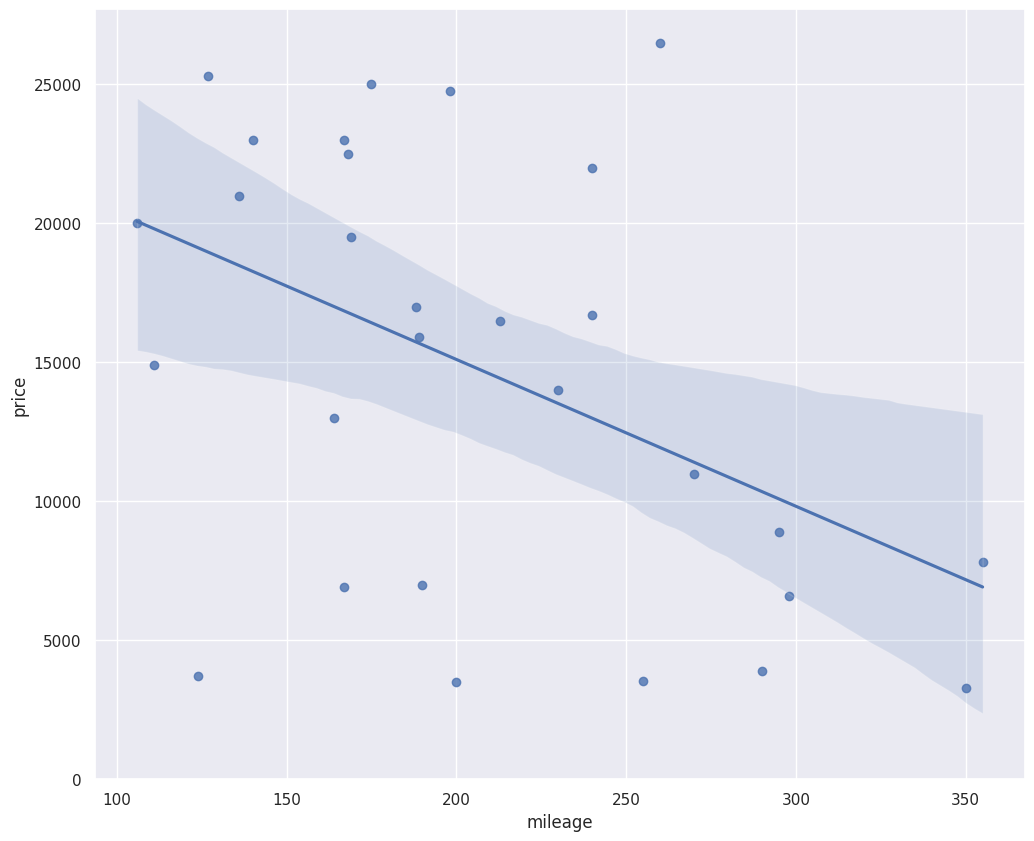

In [70]:
#using visualization
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="mileage", y="price", data=df)
plt.ylim(0,)

(0.0, 28103.43697732568)

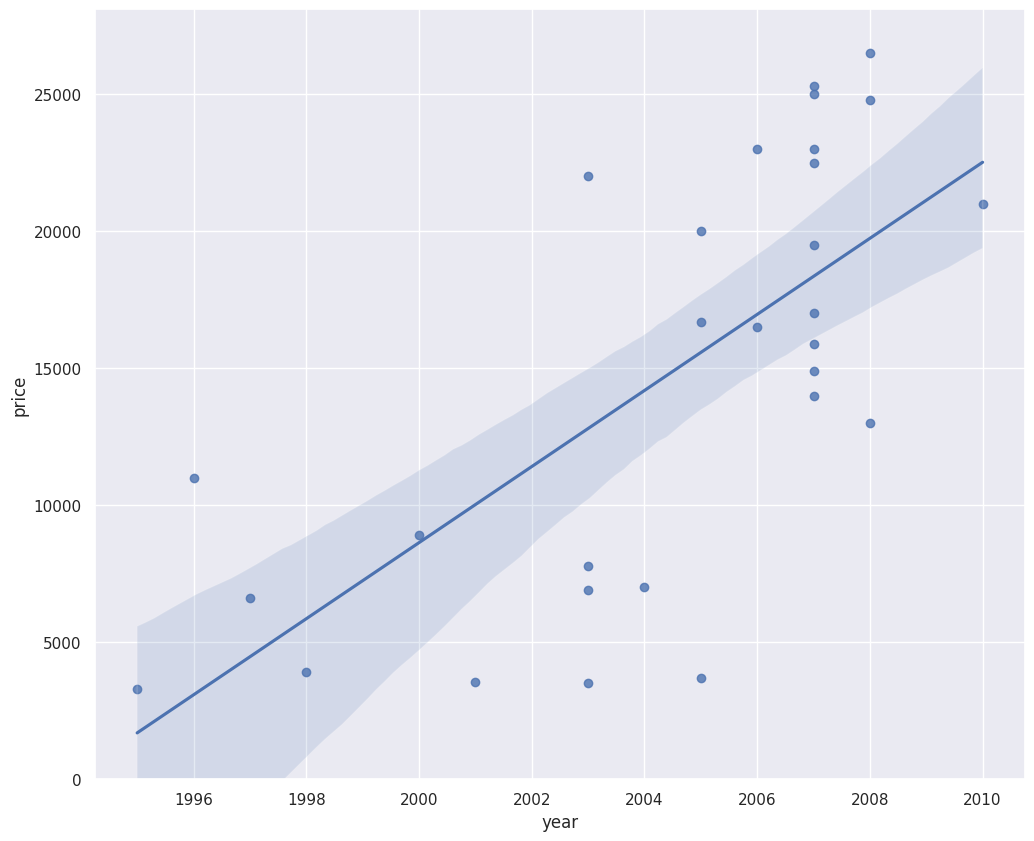

In [71]:
#using visualization
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="year", y="price", data=df)
plt.ylim(0,)

/tmp/ipykernel_37781/1872612232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
/tmp/ipykernel_37781/1872612232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist=False, color='b', label='Fitted Val

<Axes: xlabel='price', ylabel='Density'>

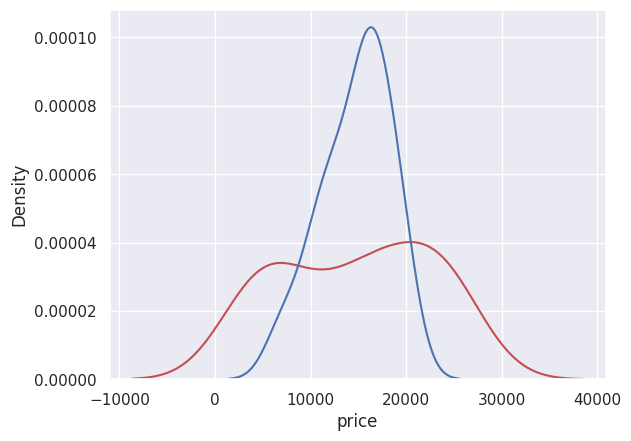

In [76]:
axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=axl)

In [78]:
from sklearn.metrics import  mean_squared_error
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The R-square is:  0.21038044334728379
The mean square error of price and predicted value is:  46760955.19098926


In [87]:
# splitting the dataset into training and testing values.
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state = 1)


In [85]:
train_x.head()

,mileage
3,124
10,270
23,167
22,168
4,290


In [88]:
test_x.head()

,mileage
14,189
21,240
18,169
20,136
25,198
